# 1. 하나의 Image file에서의 얼굴 인식

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


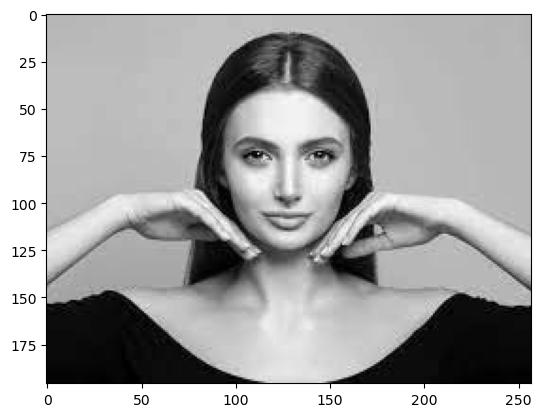

In [2]:
#Loading the image to be tested
test_image = cv2.imread('beautiful.jpeg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

In [3]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [4]:
 haar_cascade_face = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')


In [5]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))



Faces found:  1


In [6]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

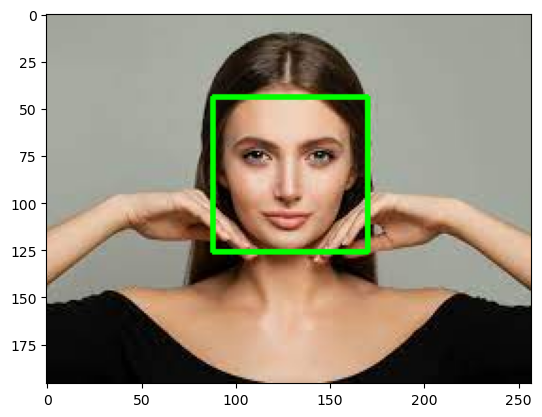

In [7]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))


# 2. 하나의 Image file 안의 여러명의 얼굴 인식

In [8]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
# create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
    return image_copy

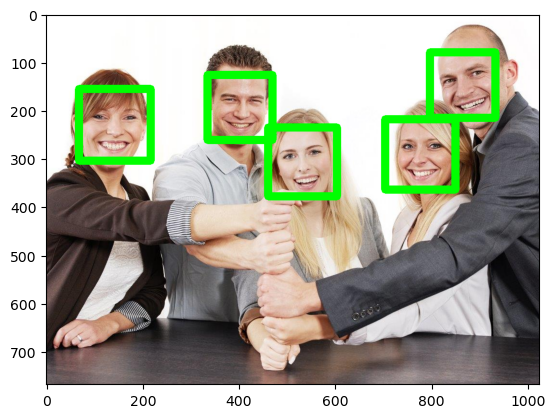

In [9]:
#loading image
test_image2 = cv2.imread('teams.jpg')
#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)
#convert to RGB and display image
plt.imshow(convertToRGB(faces))


### 

# 3. Web Cam의 실시간 이미지에서 얼굴 인식

### 1) 필요한 모듈을 설치하는 과정

In [ ]:
%%cmd
where python

In [ ]:
%%cmd
pip install https://github.com/jloh02/dlib/releases/download/v19.22/dlib-19.22.99-cp310-cp310-win_amd64.whl

In [ ]:
%%cmd
pip install dlib

In [ ]:
import dlib
dlib.__version__

In [ ]:
%%cmd
pip install face-recognition

In [ ]:
%%cmd
pip install cmake

### 2) Web Cam의 영상으로 얼굴을 감지하는 코드 

In [ ]:
import numpy as np
import face_recognition as fr

In [ ]:
video_capture = cv2.VideoCapture(0)

In [ ]:
image = fr.load_image_file("random.jpg")

In [ ]:
image_face_encoding = fr.face_encodings(image)[0]

In [ ]:
known_face_encodings = [image_face_encoding]

In [ ]:
known_face_names = ["SeungJu"]

#### 2)-1 Web cam 종료 잘 안됌

In [ ]:
while True:
    
    ret, frame = video_capture.read()
    
    rgb_frame = frame[:, :, ::-1]
    
    fc_locations = fr.face_locations(rgb_frame)
    fc_encodings = fr.face_encodings(rgb_frame, fc_locations)
    
    for(top, right, bottom, left), face_encoding in zip(fc_locations, fc_encodings):
        matches = fr.compare_faces(known_face_encodings, face_encoding)
        
        name = "unknown"
        
        fc_distances = fr.face_distance(known_face_encodings, face_encoding)
        
        match_index = np.argmin(fc_distances)
        
        if matches[match_index]:
            name = known_face_names[match_index]
            
        cv2.rectangle(frame,(left, top),(right, bottom), (0,0,255), 2)
        cv2.rectangle(frame,(left, bottom - 35),(right, bottom), (0,0,255), cv2.FILLED)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.putText(frame, name, (left + 6, bottom -6), font, 1.0,(255,255,255),1)
    
    cv2.imshow('Simplilearn face detection system', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
video_capture.release()
cv2.destroyAllwindows()

# 4. 결과 분석

#### 1. 프로그램이 q를 눌러도 종료가 정상적으로 이뤄지지 않음
#### 2. 나와 닮은 친구를 SeungJu로 인식함
#### 3. 얼굴이 아닌 부분을 얼굴로 인식하기도 함
#### 4. 정면이 아니거나, 아예 얼굴 자체를 인식 못하기도 함


### 1) 잘된 예시
<img src="image1.png" align="left">  
  

### 2) 잘못된 예시
<img src="image2.png" align="left">

### 참고 링크:

1) 기존 OpenCV 참고  https://www.datacamp.com/tutorial/face-detection-python-opencv?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=143216588577&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=645433043010&utm_targetid=aud-392016246653:dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=1030686&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tutorials_2-b2c_3-row-p1_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-marayc23&gclid=CjwKCAjwzuqgBhAcEiwAdj5dRvqgjCAP7xK0x8fThPP00k2p0o_FwusEMyULpBqmkKbiSqrH_ZUSnRoCxsgQAvD_BwE

2) Haarcascade 다운
https://github.com/parulnith/Face-Detection-in-Python-using-OpenCV

3) 모듈설치 관련 영상
https://youtu.be/h6GSZ19yuXc //
https://suy379.tistory.com/76

4) 카메라로 Detection https://www.youtube.com/watch?v=T4GulkV6Ovs